# Traffic sign classification

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# The data was already split into training, validation and test set
training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Step 1: Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
sign_names = pd.read_csv('signnames.csv')

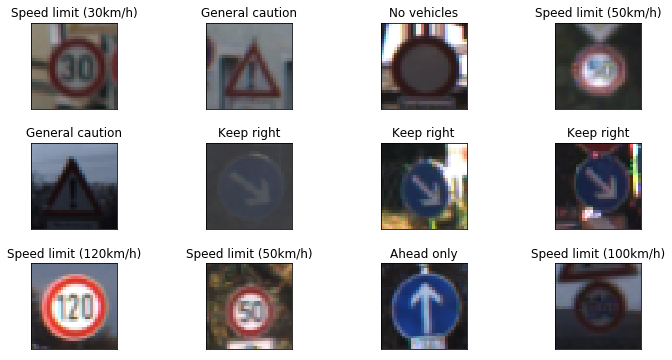

In [5]:
# Visualize a random set of images and their labels
np.random.seed(0)
indices = np.random.randint(len(X_train),size=12)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 4, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
for ax, index in zip(axes.flat, indices):
    ax.imshow(X_train[index])
    ax.set_title(sign_names['SignName'][y_train[index]])
fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


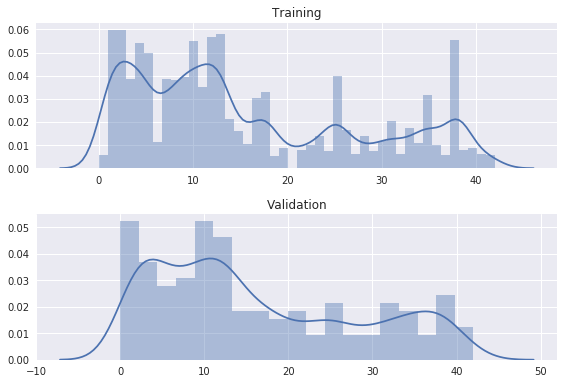

In [41]:
import seaborn as sns
fix, axes = plt.subplots(2,1)
sns.distplot(y_train, ax=axes[0])
axes[0].set_title('Training')
sns.distplot(y_valid, ax=axes[1])
axes[1].set_title('Validation')
fig.subplots_adjust(hspace=3)
plt.tight_layout()

In [7]:
# Which are the top few signs ?
train_df = pd.DataFrame({'ClassId':y_train})
train_df = pd.merge(train_df, sign_names, how='inner')
train_df['SignName'].value_counts().head(5)

Speed limit (50km/h)    2010
Speed limit (30km/h)    1980
Yield                   1920
Priority road           1890
Keep right              1860
Name: SignName, dtype: int64

### Data augmentation

In [25]:
import numpy as np
from scipy.ndimage.interpolation import rotate

def add_jitter(img):
    if np.random.random() > 0.1:
        img = rotate(img, angle = np.random.randint(-10,10,1), reshape=False)
    if np.random.random() > 0.5:
        img[np.random.randint(0,32,1), :] = 0
    if np.random.random() > 0.5:
        img[:, np.random.randint(0,32,1)] = 0
    return img

<function matplotlib.pyplot.show>

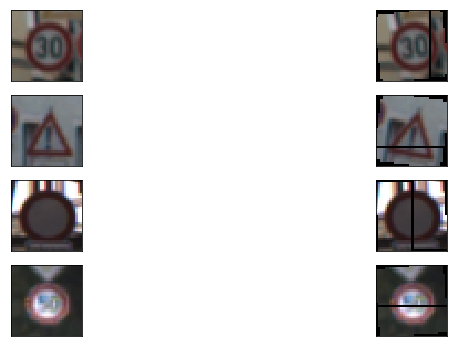

In [27]:
np.random.seed(0)
N = 4
indices = np.random.randint(len(X_train),size=N)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(N, 2, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})
for i in range(N):
    index = indices[i]
    axes[i][0].imshow(X_train[index])
    new_img = add_jitter(np.copy(X_train[index]))
    axes[i][1].imshow(new_img)
plt.show

In [34]:
N = 35000
augmented_x_train = []
augmented_y_train = []
# Copy to not effect the original
for i in range(N):
    ind = np.random.randint(len(X_train))
    test_image = np.copy(X_train[ind,:,:,:]) 
    image_with_jitter = add_jitter(test_image)
    augmented_x_train.append(image_with_jitter)
    augmented_y_train.append(y_train[ind])

In [37]:
augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

In [38]:
X_train = np.append(X_train, augmented_x_train, axis=0)
y_train = np.append(y_train, augmented_y_train, axis=0)

In [39]:
augmented_dataset = {'X_train': X_train, 'y_train':y_train}

In [40]:
pickle.dump( augmented_dataset, open( "augmented_train.p", "wb"))